In [2]:
pip install NLTK

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [20]:
import urllib.request
import matplotlib.pyplot as plt

In [11]:
## grab the webpage relating to AFC 
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Arsenal_F.C.')
html = response.read()

In [16]:
# Import beautiful soup to clean the webpage 

from bs4 import BeautifulSoup

#get a text file of the webpage contents


soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)



In [17]:
## get tokens of the text
tokens = [t for t in text.split()]

In [18]:
# import stopwords library 
from nltk.corpus import stopwords

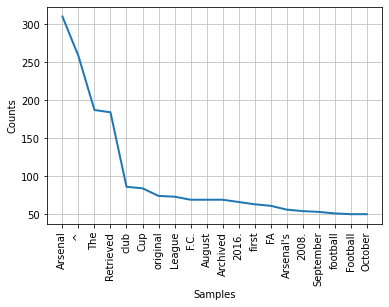

In [22]:
# Remove stop words and count word frequencies
sr = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)

#Plot word frequencies
freq.plot(20, cumulative=False)
plt.show()

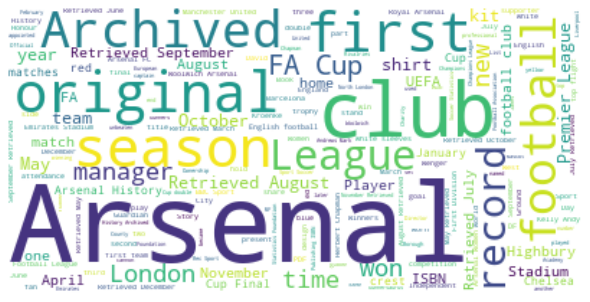

In [24]:
#Plot the word cloud for the webpage

from wordcloud import WordCloud, STOPWORDS

cloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()